In [52]:
from tweepy import OAuthHandler
from tweepy import Stream
from tweepy.streaming import StreamListener
import time

In [53]:
# setup security 
access_token = 'por motivo de segurança tirei os tokens'
access_token_secret = 'por motivo de segurança tirei os tokens'
consumer_key = 'por motivo de segurança tirei os tokens'
consumer_secret = 'por motivo de segurança tirei os tokens'

# setup file store
file = '/Users/Osvaldo Machado/Desktop/RECUPERAÇÃO DA INFORMAÇÃO/Códigos/tweets-sample.json'

In [54]:
class MyListener(StreamListener):
        
    
    def __init__(self, file):
        global the_file
        self.the_file = open(file, 'w')
        
    def on_data(self, data):
        self.the_file.write(data)
        return True
    
    def on_error(self, status):
        print(status)
        
    def file_close(self):
        self.the_file.close()        

In [79]:
listener = MyListener(file)
oauth = OAuthHandler(consumer_key, consumer_secret)
oauth.set_access_token(access_token, access_token_secret)

max_time = 30 # in seconds
start_time = time.time() 

## collecting...
stream = Stream(oauth, listener)
#stream.filter(track=['copa', 'neymar', 'messi'],async=True,languages=['pt'])
#stream.filter(track=['neymar', 'ronaldo', 'messi', 'sallah', 'hazard'],async=True)
#stream.filter(track=['croacia', 'frança', 'inglaterra', 'belgica', 'russia'],async=True)
stream.filter(track=['copadomundo', 'worldculp', 'world culp', 'copa do mundo', 'copa2018', 'semifinal'],async=True)

elapsed_time = (time.time() - start_time)
while  elapsed_time < max_time:
    elapsed_time = (time.time() - start_time)

    
print('**Finish**')
stream.disconnect()
listener.file_close()

**Finish**


In [81]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [82]:
tweets_data = []
tweets_file = open(file, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
        

In [97]:
tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
for tweet in tweets_data:
    if 'lang' in tweet:
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['user']['location'] if tweet['user']['location'] != None else None]
    
print(tweets.head(20))

   lang                                               text  \
0    en  RT @Sportskeeda: #ThailandOpen2018 🏸\n\n🇮🇳 #PV...   
1    en  As @RafaelNadal wrapped up the fourth set of h...   
2    pt  RT @_Goalpoint: Quem apoias na grande final do...   
3    pt  RT @InfosFuteboI: “Gostaria de estar com um de...   
4    en  Correction:  We're here watching a semifinal b...   
5    pt  @Parmera23 @RmHonorato @tricovo Adidas patroci...   
6    in  RT @panditfootball: Selama Piala Dunia 2014, b...   
7    pt  RT @detremura: Quem quer uma Copa do Mundo a c...   
8    pt             e esse estádio https://t.co/aSRHbcSsb2   
9    pt  RT @fifaworldcup_pt: Bélgica e Inglaterra já e...   
10   pt  RT @Curiosidades_PL: A Bélgica perdeu apenas d...   
11   pt  Thibaut Courtois e Eden Hazard titulares pela ...   
12   pt  RT @GarneroBrunno: É de uma irresponsabilidade...   
13   es  RT @SC_ESPN: ¡HAY QUINTO SET! Rafa Nadal igual...   
14   pt  RT @GoFunSports: Vamos curtir juntos a final d...   
15   pt 

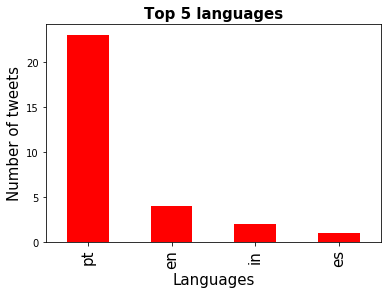

In [92]:
tweets_by_lang = tweets['lang'].value_counts()
%matplotlib inline

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')

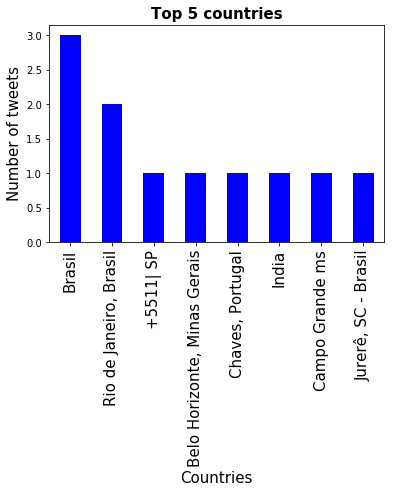

In [99]:
tweets_by_country = tweets['country'].value_counts()
%matplotlib inline

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:8].plot(ax=ax, kind='bar', color='blue')

In [100]:
import re
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [101]:
## filtrando aqueles q mais foram falados (termos mais influentes)
players = []
for tweet in tweets_data:
    if 'text' in tweet:
        if word_in_text('copadomundo', tweet['text']):
            players.append('copadomundo')
        elif word_in_text('worldculp ', tweet['text']):
            players.append('worldculp ')
        elif word_in_text('world culp', tweet['text']):
            players.append('world culp')
        elif word_in_text('copa do mundo', tweet['text']):
            players.append('copa do mundo')
        elif word_in_text('copa2018', tweet['text']):
            players.append('copa2018')
        elif word_in_text('semifinal', tweet['text']):
            players.append('semifinal')
        else:
            players.append('None')
tweets['player'] = players
tweets.head(20)

,lang,text,country,player
0,en,RT @Sportskeeda: #ThailandOpen2018 🏸\n\n🇮🇳 #PV...,India,semifinal
1,en,As @RafaelNadal wrapped up the fourth set of h...,Almost never home in Montreal :-(,semifinal
2,pt,RT @_Goalpoint: Quem apoias na grande final do...,None,copa2018
3,pt,RT @InfosFuteboI: “Gostaria de estar com um de...,"Rio de Janeiro, Brasil",None
4,en,Correction: We're here watching a semifinal b...,Maryland,semifinal
5,pt,@Parmera23 @RmHonorato @tricovo Adidas patroci...,"São Paulo, Brasil",copa do mundo
6,in,"RT @panditfootball: Selama Piala Dunia 2014, b...",Jawa?,None
7,pt,RT @detremura: Quem quer uma Copa do Mundo a c...,Brasil,copa do mundo
8,pt,e esse estádio https://t.co/aSRHbcSsb2,thalya,None
9,pt,RT @fifaworldcup_pt: Bélgica e Inglaterra já e...,Via Láctea,None


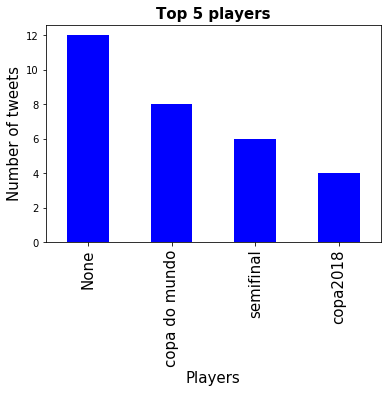

In [102]:
tweets_by_player = tweets['player'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Players', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 players', fontsize=15, fontweight='bold')
tweets_by_player[:6].plot(ax=ax, kind='bar', color='blue')

In [110]:
## Desafio: filtrando pelas coordenadas geográficas os tweets em português

tweets = pd.DataFrame()

tweets['lang'] = ''
tweets['text'] = ''
tweets['country'] = ''
tweets['place'] = ''
for tweet in tweets_data:
    if tweet['lang'] == 'pt':
        tweets.loc[len(tweets)] = [tweet['lang'],
                               tweet['text'],
                               tweet['place']['country'] if tweet['place'] != None else None,
                               tweet['user']['location']]
    
print(tweets.head(249))


   lang                                               text country  \
0    pt  RT @_Goalpoint: Quem apoias na grande final do...    None   
1    pt  RT @InfosFuteboI: “Gostaria de estar com um de...    None   
2    pt  @Parmera23 @RmHonorato @tricovo Adidas patroci...    None   
3    pt  RT @detremura: Quem quer uma Copa do Mundo a c...    None   
4    pt             e esse estádio https://t.co/aSRHbcSsb2    None   
5    pt  RT @fifaworldcup_pt: Bélgica e Inglaterra já e...    None   
6    pt  RT @Curiosidades_PL: A Bélgica perdeu apenas d...    None   
7    pt  Thibaut Courtois e Eden Hazard titulares pela ...    None   
8    pt  RT @GarneroBrunno: É de uma irresponsabilidade...    None   
9    pt  RT @GoFunSports: Vamos curtir juntos a final d...    None   
10   pt  RT @_Goalpoint: Quem apoias na grande final do...    None   
11   pt  RT @_Goalpoint: Quem apoias na grande final do...    None   
12   pt  RT @RazoesAcreditar: Não deu no futebol, mas d...    None   
13   pt  RT @DilaCom

In [ ]:
#Qual campo do JSON de um tweet corresponde cada descrição?

#Número de retweets de um tweet = reply_count
#Possivelmente sensitivo = possibly_sensitive
#As hashtags de um tweet = entities
#Número de seguidores de um usuário = user
#Quantas vezes o tweet foi retweetado com comentários = retweeted_status